In [64]:
# Importing necessary libraries for Exploratory Data Analysis(EDA)
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from scipy import stats  # For statistical analysis

# Importing libraries for data preprocessing
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler,  # For scaling numerical features
    LabelEncoder, OneHotEncoder  # For encoding categorical features
)

from sklearn.impute import SimpleImputer, KNNImputer  # For handling missing values

# Importing libraries for data visualization
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns  # For creating more attractive and informative visualizations
import plotly.express as px  # For interactive and dynamic visualizations

# Importing iterative imputer for handling missing values
from sklearn.experimental import enable_iterative_imputer  # Enable iterative imputer
from sklearn.impute import IterativeImputer  # Iterative imputer for missing value imputation

# Importing libraries for machine learning tasks
from sklearn.model_selection import (
    train_test_split,  # For splitting data into training and testing sets
    GridSearchCV, cross_val_score  # For hyperparameter tuning and cross-validation
)


# Importing pipeline for constructing machine learning pipelines
from sklearn.pipeline import Pipeline  # Pipeline for chaining preprocessing and modeling steps

# Importing performance metrics for evaluating machine learning algorithms
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,  # Classification metrics
    mean_absolute_error, mean_squared_error, r2_score  # Regression metrics
)
from sklearn.metrics import roc_curve, auc

# Ignoring warnings to prevent clutter in output
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings during runtime

**Importing the datafile & Exploratory Data Analysis**

In [2]:
#Importing the dataset into jupyter notebook
Telco_Customer_Churn = pd.read_csv("D:/Term4/Deep_Learning/Assignment/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# to print all the columns
pd.set_option('display.max_columns', None)

#to check the first 10 rows
Telco_Customer_Churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
Telco_Customer_Churn.shape

(7043, 21)

In [4]:
Telco_Customer_Churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
#checking the data type of all columns in the dataframe
Telco_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
Telco_Customer_Churn['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [7]:
Telco_Customer_Churn['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [8]:
Telco_Customer_Churn['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [9]:
Telco_Customer_Churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
# Calculating the churn percentage
total_customers = Telco_Customer_Churn['Churn'].count()
churn_counts = Telco_Customer_Churn['Churn'].value_counts()
churn_percentage = (churn_counts / total_customers) * 100
print(churn_percentage.round(2))

Churn
No     73.46
Yes    26.54
Name: count, dtype: float64


The churn rate is 26.54%

In [11]:
#Churn rate based on gender
churn_gender_counts = Telco_Customer_Churn.groupby(['gender', 'Churn']).size().unstack()
churn_gender_percentage = (churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100).round(2)
print(churn_gender_percentage)

Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16


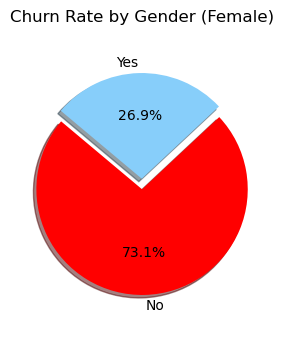

In [12]:
# Data
churn_gender_counts = Telco_Customer_Churn.groupby(['gender', 'Churn']).size().unstack()
churn_gender_percentage = (churn_gender_counts.div(churn_gender_counts.sum(axis=1), axis=0) * 100).round(2)

# Pie chart
labels = churn_gender_percentage.columns
sizes = churn_gender_percentage.loc['Female']
colors = ['red', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(3,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Churn Rate by Gender (Female)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
Telco_Customer_Churn['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [14]:
Telco_Customer_Churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
Telco_Customer_Churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the dataframe,  
customerID is the primary key having all distinct values

In [16]:
#dropping the customerID column as it won't be effective in predicting churn 
Telco_Customer_Churn.drop('customerID', axis=1, inplace=True)

**Visualising data to understand what categorical features can affect the customer churn**

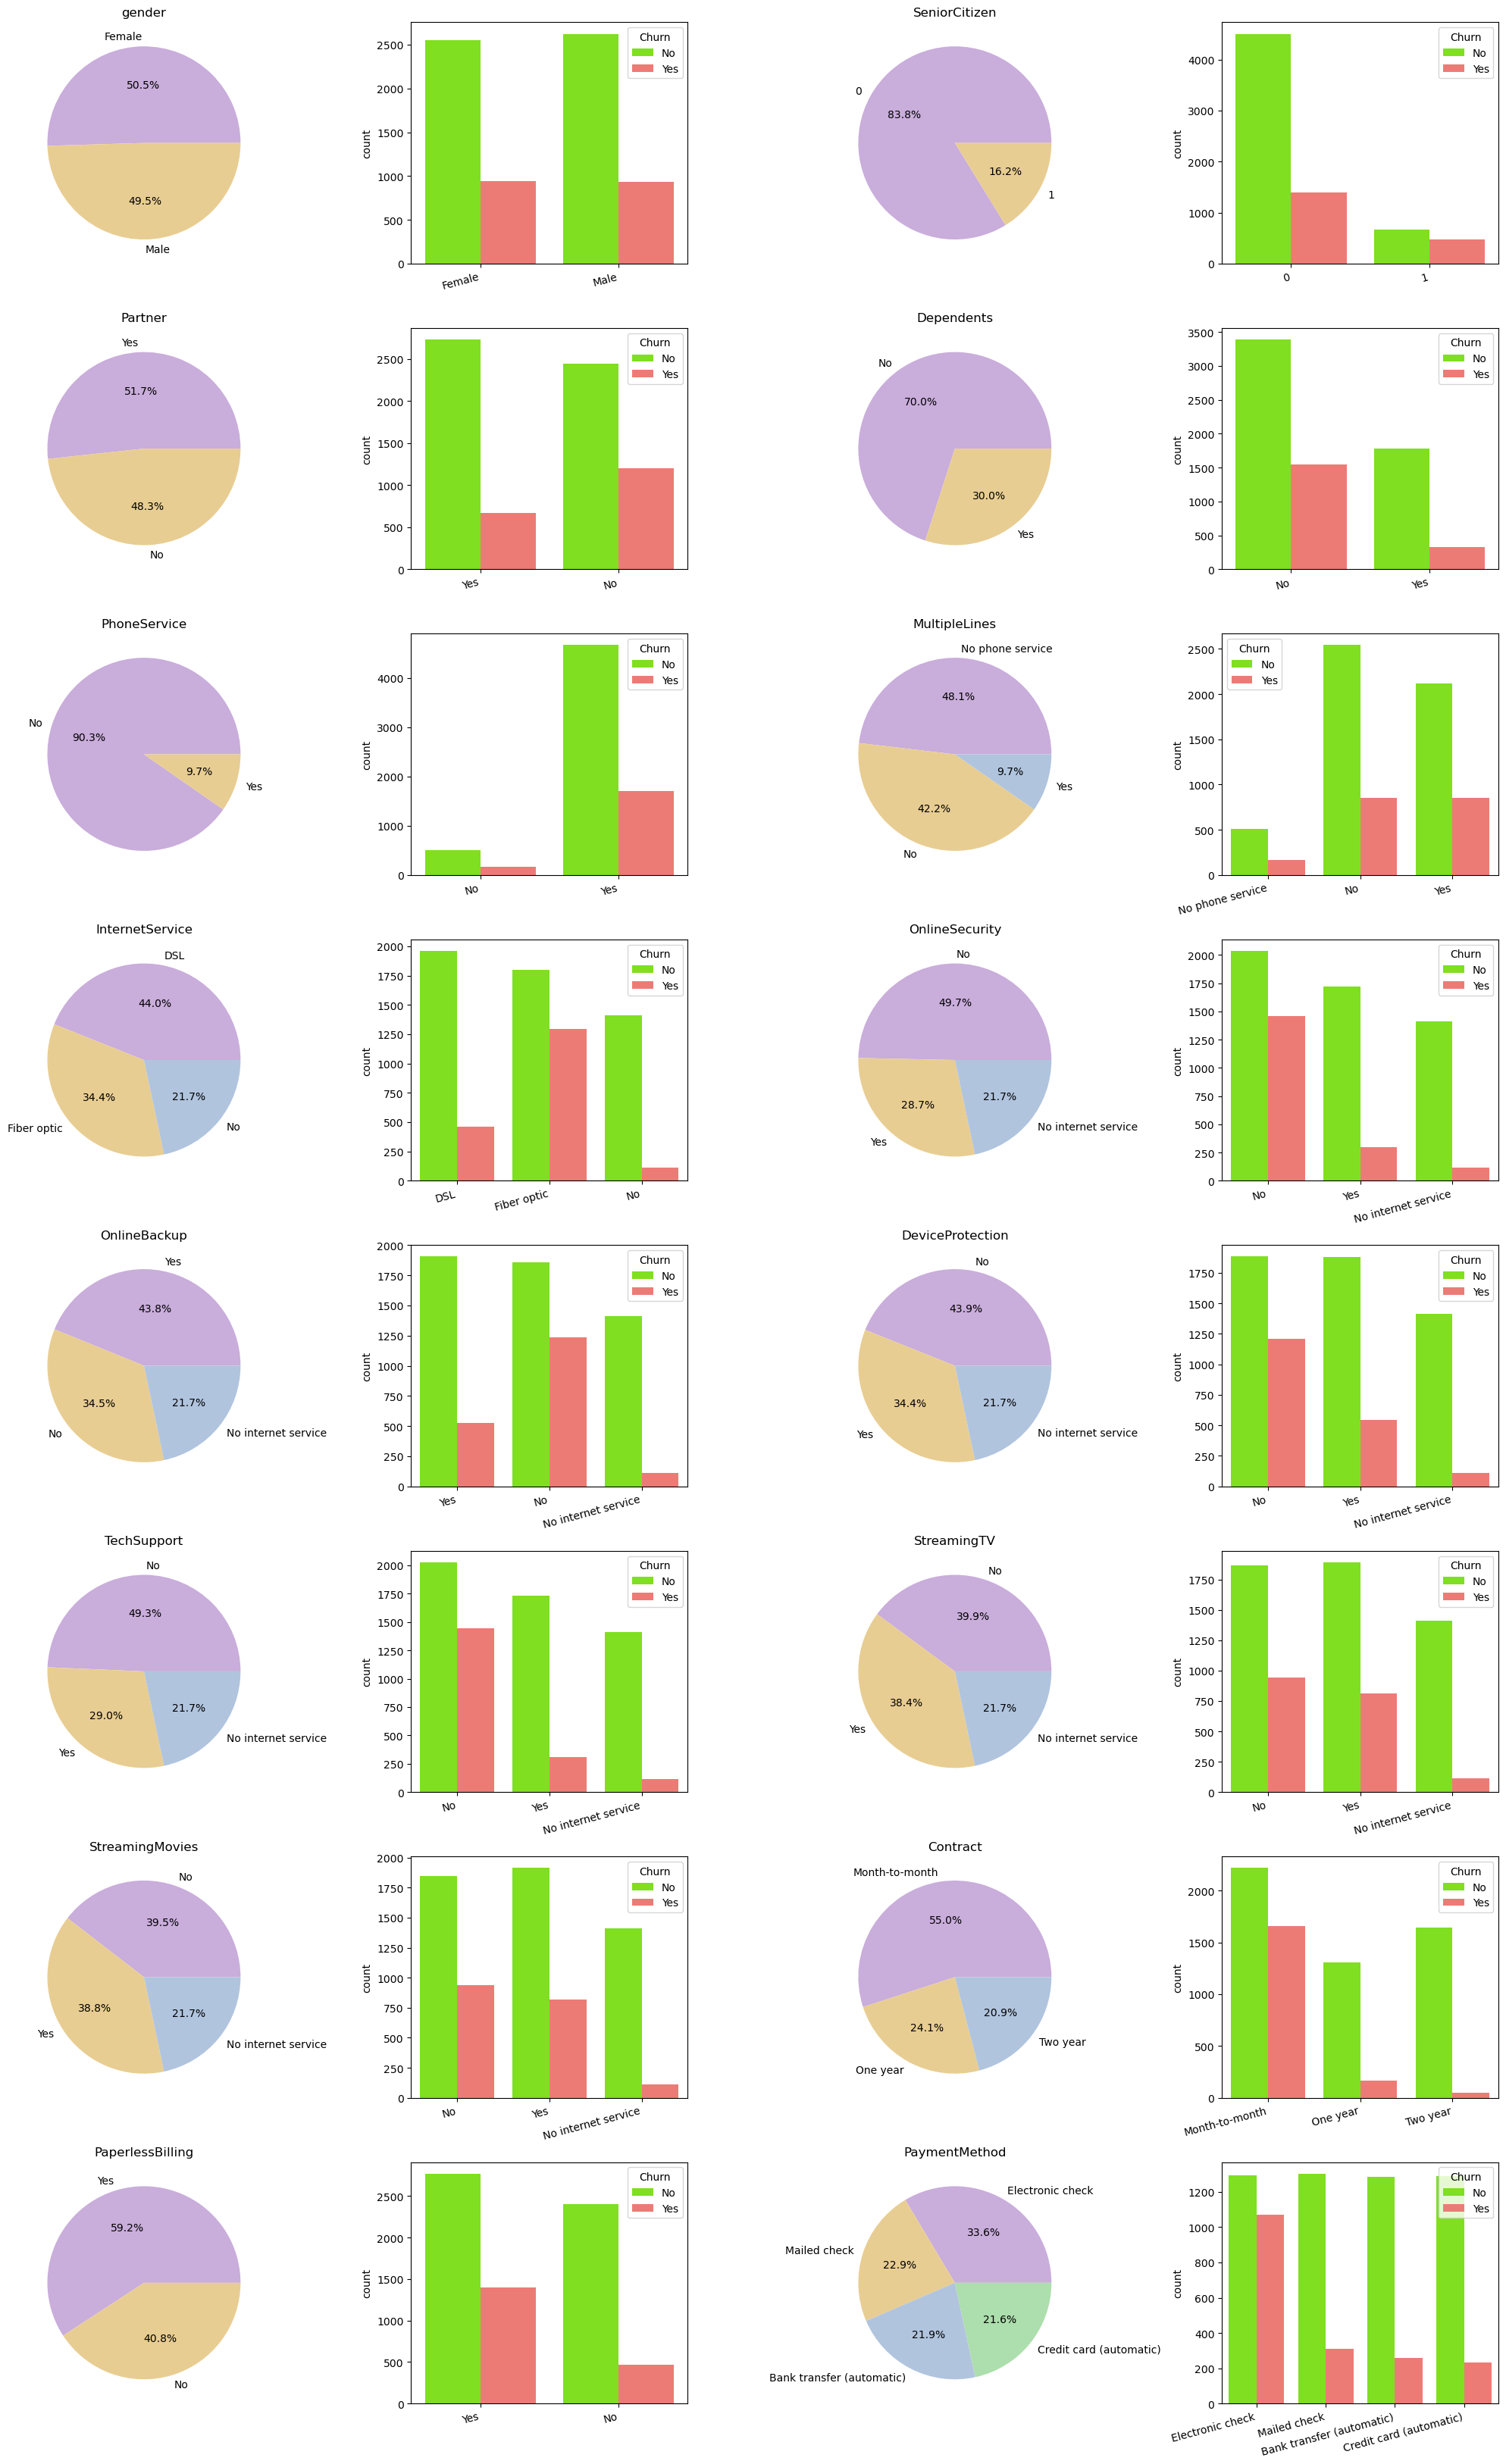

In [17]:
#visualising the distribution of categorical features with Customer churn
Telco_Customer_Churn_dist = Telco_Customer_Churn.copy()
Telco_Customer_Churn_dist.drop(['tenure', 'MonthlyCharges', 'TotalCharges'],
                axis=1, inplace=True)

plt.figure(figsize=(20, 40))

for i, col in enumerate(Telco_Customer_Churn_dist.iloc[:, :-1]):
    plt.subplot(10, 4, i*2+1)
    
    plt.title(col)
    plt.pie(Telco_Customer_Churn_dist[col].value_counts(),
            autopct='%1.1f%%', labels=Telco_Customer_Churn_dist[col].unique(),
            colors=['#c9addb', '#e8cd92', '#B0C4DE', '#addead'])
    
    plt.subplot(10, 4, i*2+2)
    sns.countplot(data=Telco_Customer_Churn_dist,
                  x=col,
                  hue='Churn',
                  palette=['#7FFF00', '#FF6963'])
    plt.xticks(rotation=15, ha='right')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [18]:
#Removing spaces from the column 'TotalCharges'
Telco_Customer_Churn['TotalCharges'] = Telco_Customer_Churn['TotalCharges'].replace(' ', '')
#Filling emply cells in the 'TotalCharges' column with Nan 
Telco_Customer_Churn = Telco_Customer_Churn.replace(r'^\s*$', np.nan, regex=True)
#Changing the datatype of TotalCharges from object to float as values in that column are continuous variables
Telco_Customer_Churn['TotalCharges'] = Telco_Customer_Churn['TotalCharges'].astype('float64')

In [19]:
#checking whether the datatype of TotalCharges column converted to float64 from object
Telco_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
Telco_Customer_Churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
Telco_Customer_Churn.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
#drop all rows with missing values
Telco_Customer_Churn.dropna(inplace = True)

# to print all the columns
pd.set_option('display.max_columns', None)

#to check the first 10 rows
Telco_Customer_Churn.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [23]:
Telco_Customer_Churn.shape

(7032, 20)

**Preprocessing the data**

In [24]:
# Importing libraries for data preprocessing
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler,  # For scaling numerical features
    LabelEncoder, OneHotEncoder  # For encoding categorical features
)

In [25]:
Telco_Customer_Churn_code = Telco_Customer_Churn.copy()
Telco_Customer_Churn_code.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

le = LabelEncoder()
Telco_Customer_Churn_code = Telco_Customer_Churn_code.apply(lambda x: le.fit_transform(x))

Telco_Customer_Churn_code[['tenure', 'MonthlyCharges', 'TotalCharges']] = Telco_Customer_Churn[['tenure', 'MonthlyCharges', 'TotalCharges']]
Telco_Customer_Churn_code.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,2,53.85,108.15
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,70.70,151.65


In [26]:
# Identify categorical columns
categorical_cols = Telco_Customer_Churn.select_dtypes(include=['category', 'object']).columns

# Apply OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Setting drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(Telco_Customer_Churn[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
Telco_Customer_Churn.drop(columns=categorical_cols, inplace=True)

# Reset index of the DataFrame
Telco_Customer_Churn.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
Telco_Customer_Churn = pd.concat([Telco_Customer_Churn, encoded_df], axis=1)


In [27]:
Telco_Customer_Churn

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7028,0,72,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7029,0,11,29.60,346.45,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,1,4,74.40,306.60,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [28]:
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [29]:
encoded_df.head(20)

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# rename churn_yes to churn
Telco_Customer_Churn.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
Telco_Customer_Churn.shape

(7032, 47)

**Split into training & test datasets**

In [31]:
# Split data into X and y
X = Telco_Customer_Churn.drop(columns='Churn')
y = Telco_Customer_Churn['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply MinMaxScaler() to normalize numerical values
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled

array([[1.        , 0.74647887, 0.82918327, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.21126761, 0.66533865, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.1971831 , 0.81573705, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.35211268, 0.79531873, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.97183099, 0.01543825, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.12676056, 0.79930279, ..., 1.        , 0.        ,
        0.        ]])

In [32]:
y_train

3987    1.0
2329    0.0
486     0.0
3487    0.0
4218    0.0
       ... 
5762    0.0
3483    0.0
4465    0.0
5546    0.0
4445    1.0
Name: Churn, Length: 5625, dtype: float64

In [33]:
#checking the shapes of training & test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5625, 46), (5625,), (1407, 46), (1407,))

**Applying Nueral Network with 2 Hidden layers using ReLU & sigmoid for output layer**

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64) 
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))  #first hidden layer
        x = torch.relu(self.fc2(x))  #second hidden layer
        x = self.sigmoid(self.fc3(x)) #output layer
        return x

# Initialize the model
input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()    #BinaryCrossEntropy 
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 80
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = (outputs >= 0.5).float()
    accuracy = (predicted == y_test_tensor.view(-1, 1)).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')


Epoch [1/80], Loss: 0.6943
Epoch [2/80], Loss: 0.6869
Epoch [3/80], Loss: 0.6795
Epoch [4/80], Loss: 0.6721
Epoch [5/80], Loss: 0.6647
Epoch [6/80], Loss: 0.6572
Epoch [7/80], Loss: 0.6495
Epoch [8/80], Loss: 0.6417
Epoch [9/80], Loss: 0.6336
Epoch [10/80], Loss: 0.6254
Epoch [11/80], Loss: 0.6169
Epoch [12/80], Loss: 0.6083
Epoch [13/80], Loss: 0.5995
Epoch [14/80], Loss: 0.5907
Epoch [15/80], Loss: 0.5819
Epoch [16/80], Loss: 0.5731
Epoch [17/80], Loss: 0.5646
Epoch [18/80], Loss: 0.5562
Epoch [19/80], Loss: 0.5481
Epoch [20/80], Loss: 0.5403
Epoch [21/80], Loss: 0.5329
Epoch [22/80], Loss: 0.5258
Epoch [23/80], Loss: 0.5191
Epoch [24/80], Loss: 0.5127
Epoch [25/80], Loss: 0.5067
Epoch [26/80], Loss: 0.5008
Epoch [27/80], Loss: 0.4950
Epoch [28/80], Loss: 0.4893
Epoch [29/80], Loss: 0.4835
Epoch [30/80], Loss: 0.4777
Epoch [31/80], Loss: 0.4717
Epoch [32/80], Loss: 0.4655
Epoch [33/80], Loss: 0.4591
Epoch [34/80], Loss: 0.4526
Epoch [35/80], Loss: 0.4460
Epoch [36/80], Loss: 0.4393
E

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert test data to tensors
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Prediction
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.round().numpy()

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Accuracy: 0.7299218194740583, Precision: 0.0, Recall: 0.0, F1 Score: 0.0


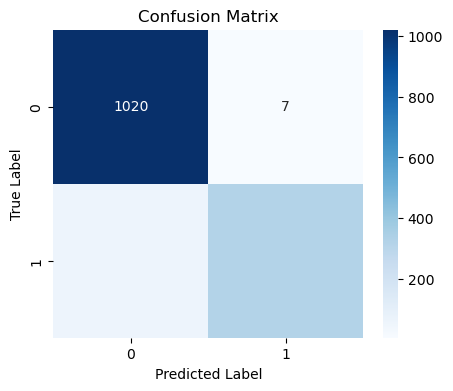

In [59]:
# Convert tensors to numpy arrays
y_true = y_test_tensor.numpy()
y_pred = predicted.numpy()

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [60]:
# Initializing lists to store loss and accuracy values
train_losses = []
train_accuracies = []

# Modifying training loop to store loss and accuracy
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()
    
    # Store loss
    train_losses.append(loss.item())
    
    # Calculate and store accuracy
    predicted_train = (outputs >= 0.5).float()
    train_accuracy = (predicted_train == y_train_tensor.view(-1, 1)).float().mean()
    train_accuracies.append(train_accuracy.item())
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {train_accuracy.item():.4f}')

Epoch [1/80], Loss: 0.2133, Accuracy: 0.9506
Epoch [2/80], Loss: 0.2081, Accuracy: 0.9529
Epoch [3/80], Loss: 0.2029, Accuracy: 0.9548
Epoch [4/80], Loss: 0.1976, Accuracy: 0.9577
Epoch [5/80], Loss: 0.1923, Accuracy: 0.9600
Epoch [6/80], Loss: 0.1870, Accuracy: 0.9632
Epoch [7/80], Loss: 0.1817, Accuracy: 0.9648
Epoch [8/80], Loss: 0.1763, Accuracy: 0.9662
Epoch [9/80], Loss: 0.1710, Accuracy: 0.9712
Epoch [10/80], Loss: 0.1657, Accuracy: 0.9740
Epoch [11/80], Loss: 0.1605, Accuracy: 0.9762
Epoch [12/80], Loss: 0.1552, Accuracy: 0.9785
Epoch [13/80], Loss: 0.1500, Accuracy: 0.9803
Epoch [14/80], Loss: 0.1449, Accuracy: 0.9810
Epoch [15/80], Loss: 0.1398, Accuracy: 0.9829
Epoch [16/80], Loss: 0.1348, Accuracy: 0.9844
Epoch [17/80], Loss: 0.1299, Accuracy: 0.9852
Epoch [18/80], Loss: 0.1251, Accuracy: 0.9865
Epoch [19/80], Loss: 0.1203, Accuracy: 0.9877
Epoch [20/80], Loss: 0.1157, Accuracy: 0.9888
Epoch [21/80], Loss: 0.1112, Accuracy: 0.9899
Epoch [22/80], Loss: 0.1068, Accuracy: 0.99

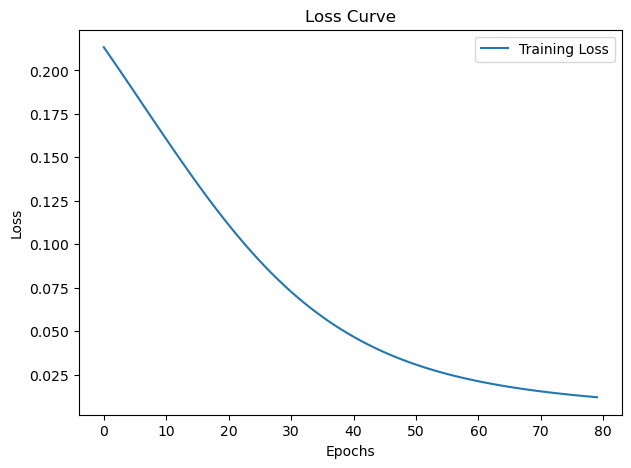

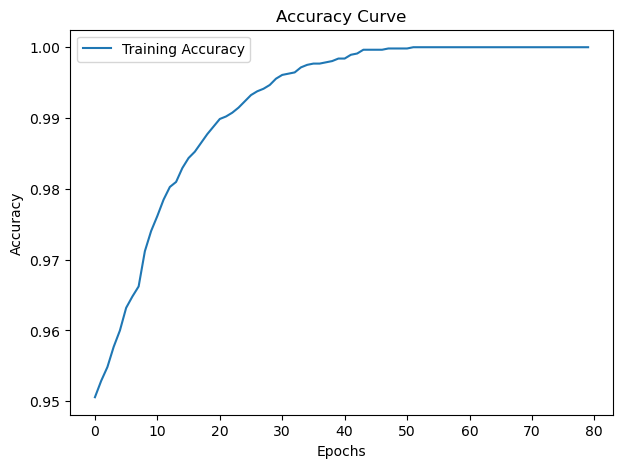

In [62]:
# Plotting the loss curve
plt.figure(figsize=(7, 5))
plt.plot(train_losses, label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy curve
plt.figure(figsize=(7, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

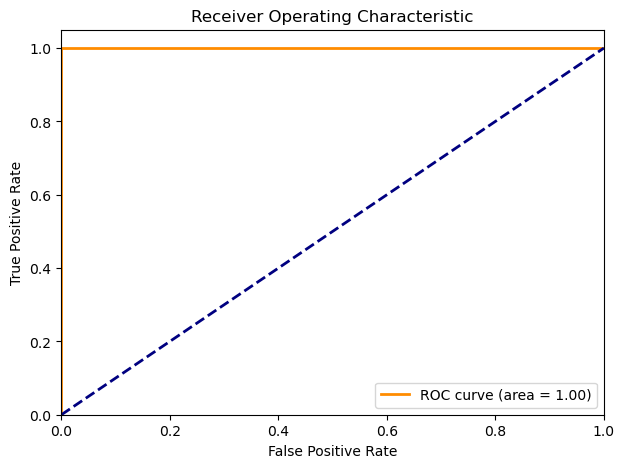

In [67]:
# Evaluate the model to get probabilities
model.eval()
with torch.no_grad():
    probabilities = model(X_test_tensor).numpy()

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test_tensor.numpy(), probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()